<a href="https://colab.research.google.com/github/farrelrassya/teachingMLDL/blob/main/01.%20Machine%20Learning/03.%20Week%203/Notebook/02_Building_k_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 8.2 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import mglearn

In [3]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

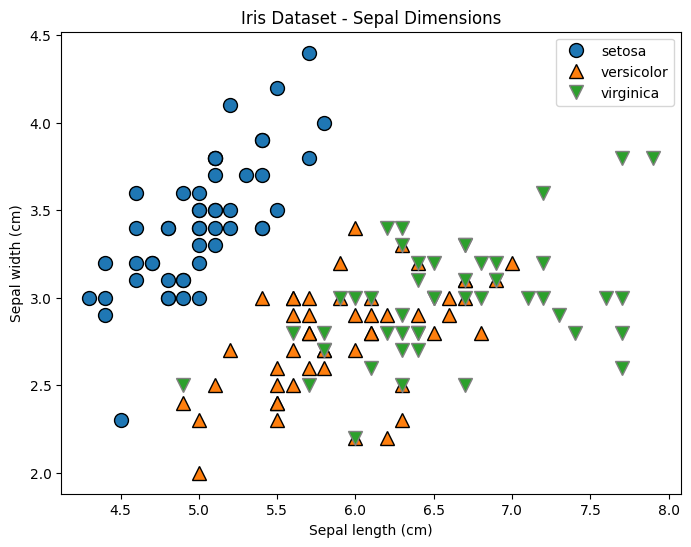

In [4]:
# Select the first two features
X = X[:, :2]

# Plot the data
plt.figure(figsize=(8, 6))
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(iris.target_names, loc='best')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Iris Dataset - Sepal Dimensions')
plt.show()

In [5]:
# Create a k-NN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

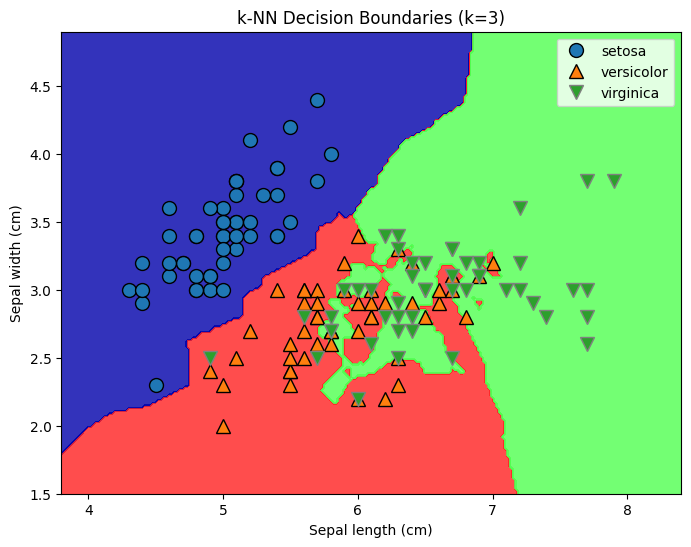

In [6]:
# Define the boundaries of the plot
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

# Create a mesh grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict classifications for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=mglearn.cm3)

# Plot the training points
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(iris.target_names, loc='best')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('k-NN Decision Boundaries (k=3)')
plt.show()

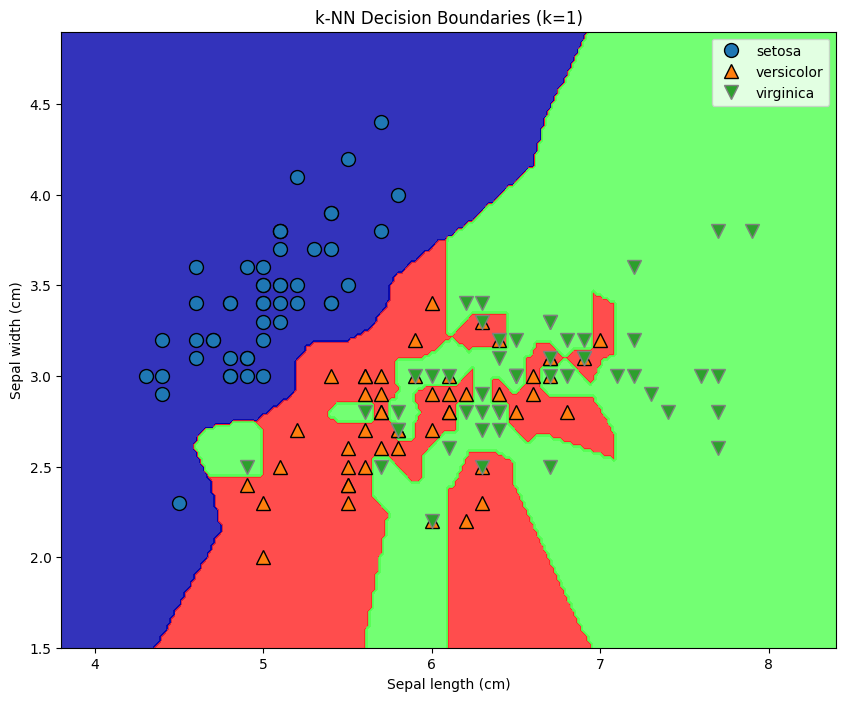

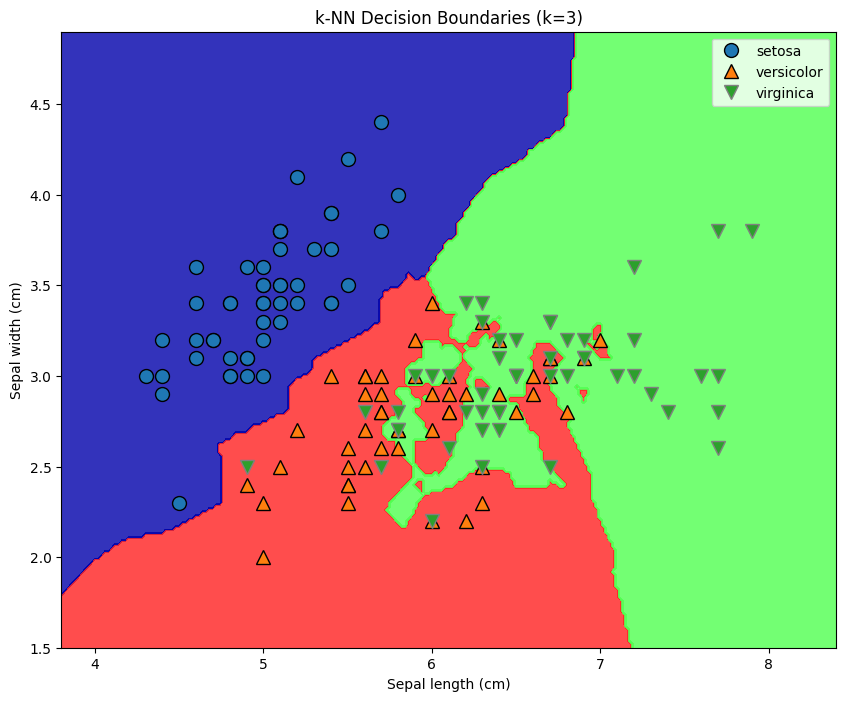

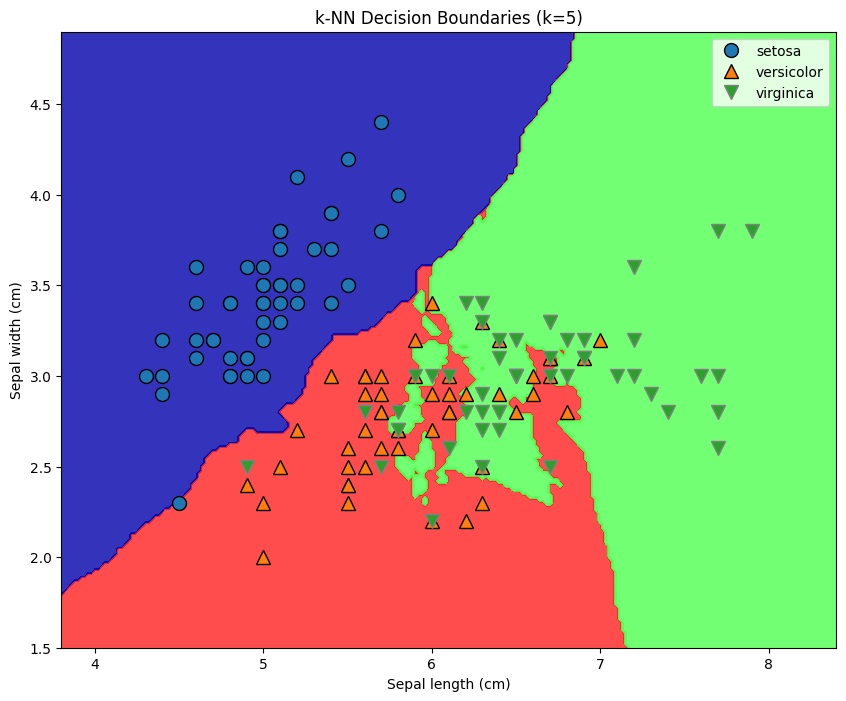

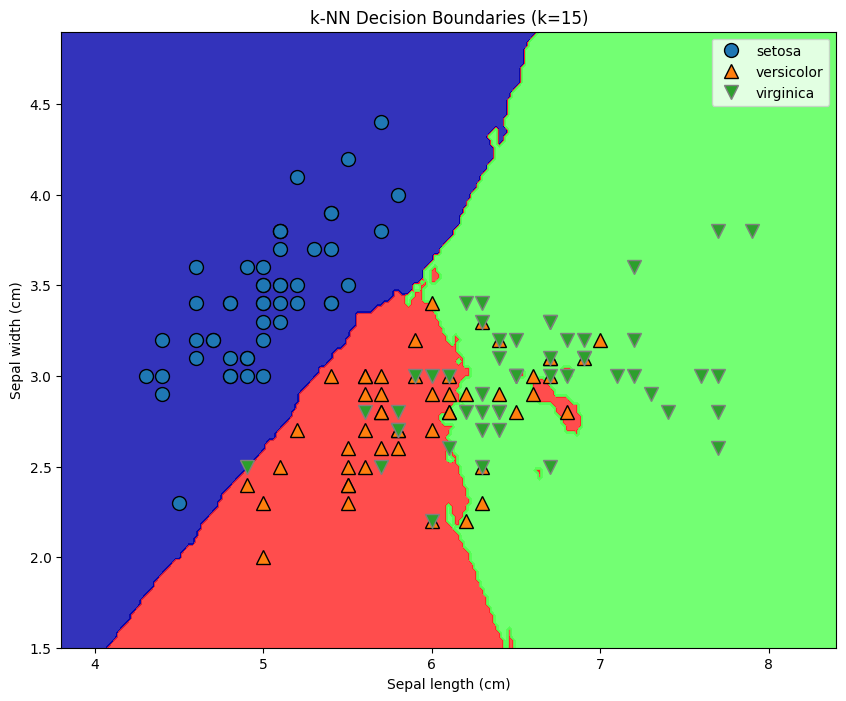

In [7]:
# List of k values to explore
k_values = [1, 3, 5, 15]

for k in k_values:
    # Create and train the k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)

    # Predict over the mesh grid
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plotting
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=mglearn.cm3)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
    plt.legend(iris.target_names, loc='best')
    plt.xlabel('Sepal length (cm)')
    plt.ylabel('Sepal width (cm)')
    plt.title(f'k-NN Decision Boundaries (k={k})')
    plt.show()

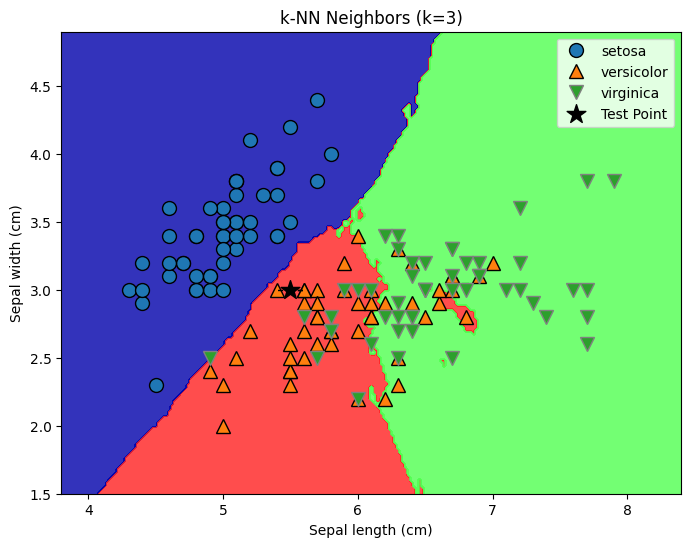

In [8]:
# Select a test point
test_point = np.array([[5.5, 3.0]])

# Find the neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
distances, indices = knn.kneighbors(test_point)

# Plotting
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=mglearn.cm3)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.scatter(test_point[0, 0], test_point[0, 1], marker='*', s=200, c='black', label='Test Point')

# Highlight the neighbors
for index in indices[0]:
    plt.plot([test_point[0, 0], X[index, 0]], [test_point[0, 1], X[index, 1]], 'k--', linewidth=1)

plt.legend(iris.target_names.tolist() + ['Test Point'], loc='best')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('k-NN Neighbors (k=3)')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
# We use a 75%/25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 112 samples
Test set size: 38 samples


In [10]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# List of k values to explore
k_values = [1, 3, 5, 15, 20]

for k in k_values:
    # Create and train the k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict on the test set
    y_pred = knn.predict(X_test)

    # Compute evaluation metrics
    print(f"\nEvaluation metrics for k={k}:")
    print("-" * 60)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.2f}")


Evaluation metrics for k=1:
------------------------------------------------------------
Confusion Matrix:
[[15  0  0]
 [ 0  5  6]
 [ 0  6  6]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.45      0.45      0.45        11
   virginica       0.50      0.50      0.50        12

    accuracy                           0.68        38
   macro avg       0.65      0.65      0.65        38
weighted avg       0.68      0.68      0.68        38

Accuracy Score: 0.68

Evaluation metrics for k=3:
------------------------------------------------------------
Confusion Matrix:
[[15  0  0]
 [ 0  8  3]
 [ 0  5  7]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.62      0.73      0.67        11
   virginica       0.70      0.58      0.64        12

    accuracy                           0.7

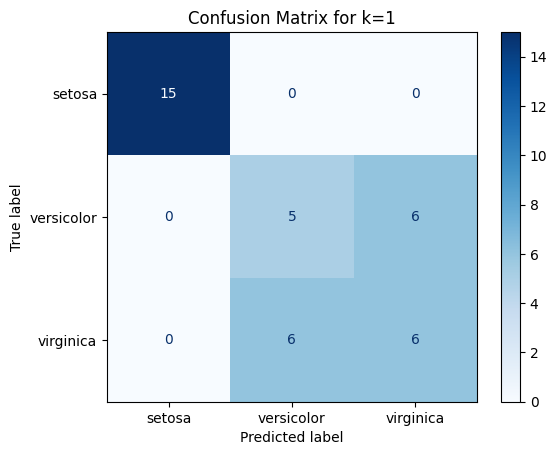

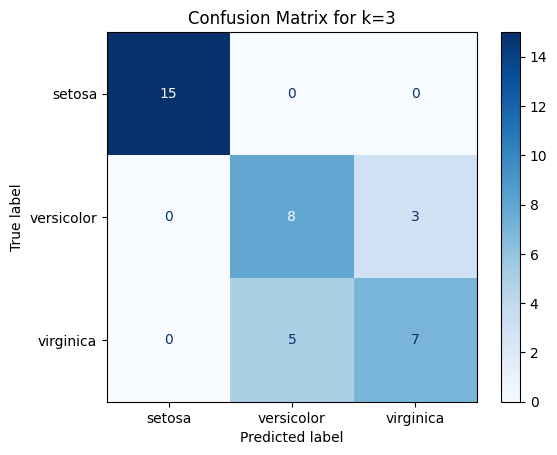

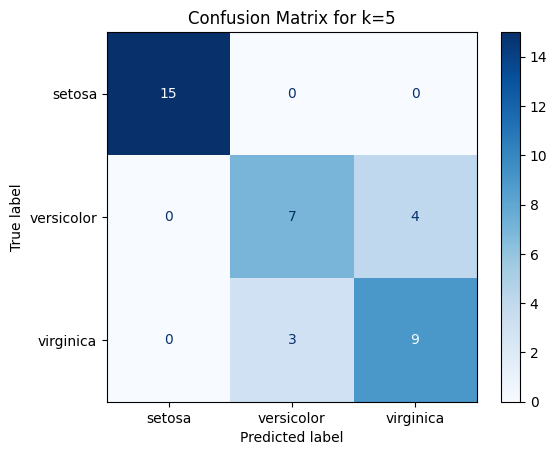

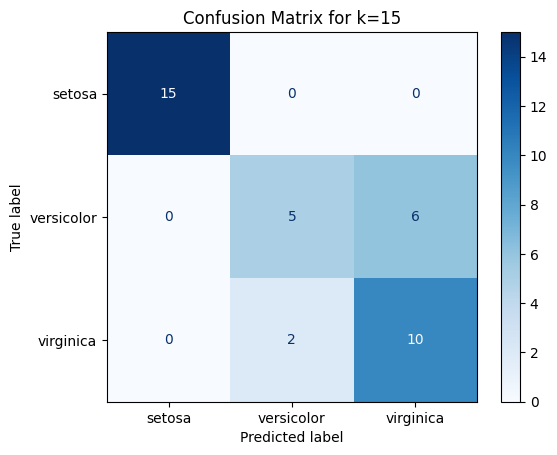

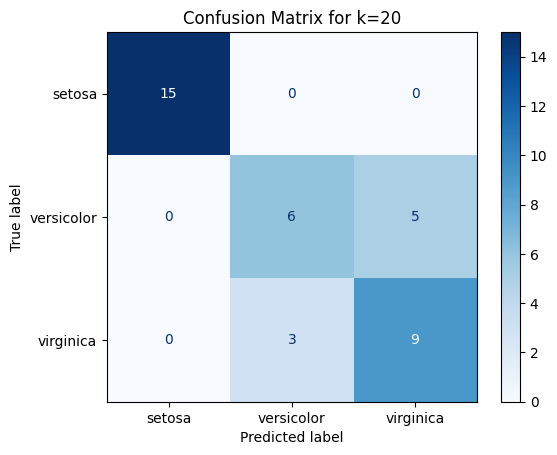

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay

for k in k_values:
    # Create and train the k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict on the test set
    y_pred = knn.predict(X_test)

    # Plot the confusion matrix
    disp = ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred, display_labels=iris.target_names, cmap=plt.cm.Blues, normalize=None
    )
    disp.ax_.set_title(f'Confusion Matrix for k={k}')
    plt.show()